In [1]:
import numpy as np
import pandas as pd
import os

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score

from sklearn.datasets import fetch_openml
from keras.utils import np_utils

from matplotlib import pyplot as plt
from matplotlib.image import imread
import seaborn as sns
%matplotlib inline
plt.style.use('default')

from itertools import cycle

import pickle

Using TensorFlow backend.
e:\Users\user\anaconda3\envs\metis\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\Users\user\anaconda3\envs\metis\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\Users\user\anaconda3\envs\metis\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\Users\user\anaconda3\envs\metis\lib\site-packag

In [14]:
df_train = pd.read_csv('..\\..\\Metis_Project5_data\\train.csv')

In [15]:
df_train.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31072 entries, 0 to 31071
Data columns (total 2 columns):
Id        31072 non-null object
Target    31072 non-null object
dtypes: object(2)
memory usage: 485.6+ KB


In [17]:
df_train['Target'][0:5]

0       16 0
1    7 1 2 0
2          5
3          1
4         18
Name: Target, dtype: object

In [18]:
type(df_train['Target'][0])

str

In [19]:
df_train['Target'].value_counts()

0            2414
25 0         1998
23           1653
25           1470
7            1163
             ... 
25 6 2 0        1
20 23           1
25 18 1 0       1
12 6            1
22 25 7 0       1
Name: Target, Length: 582, dtype: int64

In [20]:
len(df_train['Target'])

31072

In [21]:
for i in range(28):
    print(i, len(df_train[df_train['Target']==f'{i}']))

0 2414
1 271
2 808
3 654
4 1077
5 983
6 622
7 1163
8 31
9 17
10 0
11 601
12 232
13 157
14 484
15 0
16 27
17 0
18 314
19 522
20 98
21 1058
22 213
23 1653
24 122
25 1470
26 134
27 1


In [22]:
df_0 = df_train[df_train['Target']=='0']
df_4 = df_train[df_train['Target']=='4']
df_5 = df_train[df_train['Target']=='5']
df_7 = df_train[df_train['Target']=='7']
df_21 = df_train[df_train['Target']=='21']
df_23 = df_train[df_train['Target']=='23']
df_25 = df_train[df_train['Target']=='25']
list_df = [df_0, df_4, df_5, df_7, df_21, df_23, df_25]
list_name_df = ['df_0', 'df_4', 'df_5', 'df_7', 'df_21', 'df_23', 'df_25']

In [23]:
path = '..\\..\\Metis_Project5_data\\train\\'
suffix = '_green.png'

In [63]:
ar_25_pred_dict = np.load('ar_25_predictions_14Jun.npz')
ar_25_pred = ar_25_pred_dict['arr_0']
ar_25_pred.shape

(1470, 1)

In [64]:
df_25.shape

(1470, 2)

In [65]:
df_25['Predictions'] = ar_25_pred

e:\Users\user\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_25.head()

Id Target  Predictions
15  00383b44-bbbb-11e8-b2ba-ac1f6b6435d0     25     1.000000
17  003957a8-bbb7-11e8-b2ba-ac1f6b6435d0     25     0.999877
28  004f7c66-bb9b-11e8-b2b9-ac1f6b6435d0     25     0.977383
68  0093f39a-bbc9-11e8-b2bc-ac1f6b6435d0     25     0.980206
80  00ae0ea6-bb9c-11e8-b2b9-ac1f6b6435d0     25     0.999877

In [68]:
df_25[df_25['Predictions']<= 1].sort_values('Predictions', ascending=False).head()

Id Target  Predictions
11082  5c1e66de-bbae-11e8-b2ba-ac1f6b6435d0     25          1.0
16593  899632a6-bbca-11e8-b2bc-ac1f6b6435d0     25          1.0
20205  a6da30fe-bbc7-11e8-b2bc-ac1f6b6435d0     25          1.0
11080  5c1ad208-bb9f-11e8-b2b9-ac1f6b6435d0     25          1.0
27762  e4b344b6-bbad-11e8-b2ba-ac1f6b6435d0     25          1.0

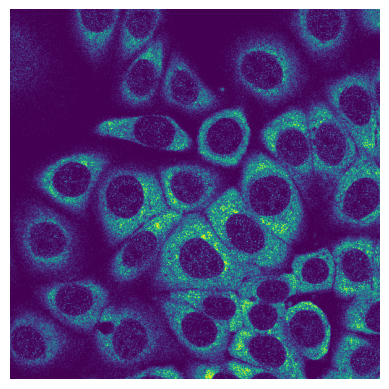

In [69]:
image = imread(path + '5c1e66de-bbae-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

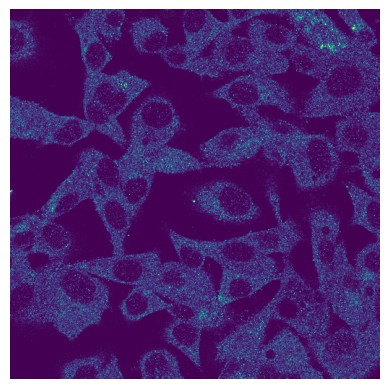

In [70]:
image = imread(path + '899632a6-bbca-11e8-b2bc-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

In [102]:
df_25[df_25['Predictions']<= 0.75].sort_values('Predictions', ascending=False).head(10)

Id Target  Predictions
6985   39ee853c-bb9d-11e8-b2b9-ac1f6b6435d0     25     0.749717
6672   378fe4e6-bbbd-11e8-b2ba-ac1f6b6435d0     25     0.749098
708    064c3eea-bba2-11e8-b2b9-ac1f6b6435d0     25     0.748729
21972  b55bda66-bba8-11e8-b2ba-ac1f6b6435d0     25     0.746850
14280  7680dcb2-bbb5-11e8-b2ba-ac1f6b6435d0     25     0.742666
23784  c4121144-bbb5-11e8-b2ba-ac1f6b6435d0     25     0.741711
16417  87ea2b64-bbc6-11e8-b2bc-ac1f6b6435d0     25     0.740615
27983  e672ed7e-bbc6-11e8-b2bc-ac1f6b6435d0     25     0.740572
3156   1a5cb5b4-bbb5-11e8-b2ba-ac1f6b6435d0     25     0.736454
20696  ab157858-bbb9-11e8-b2ba-ac1f6b6435d0     25     0.732258

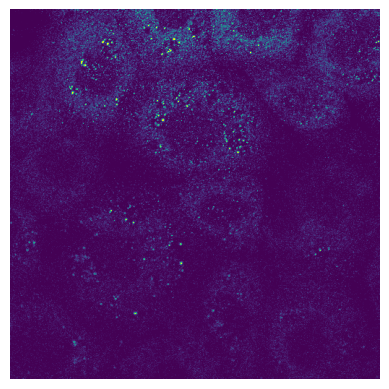

In [108]:
image = imread(path + 'ab157858-bbb9-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

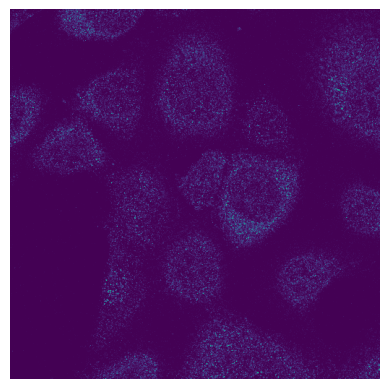

In [75]:
image = imread(path + '39ee853c-bb9d-11e8-b2b9-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

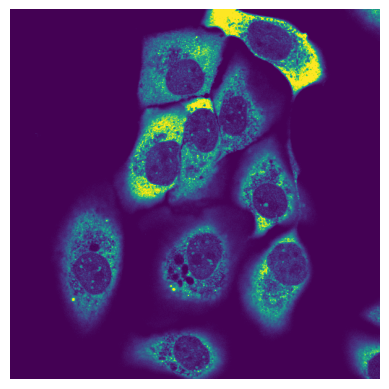

In [79]:
image = imread(path + '064c3eea-bba2-11e8-b2b9-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

In [80]:
df_25[df_25['Predictions']<= 0.5].sort_values('Predictions', ascending=False).head()

Id Target  Predictions
17215  8e8cb5b8-bbc6-11e8-b2bc-ac1f6b6435d0     25     0.498689
1417   0bc3dbe0-bbbf-11e8-b2ba-ac1f6b6435d0     25     0.498228
14059  7492bf68-bbad-11e8-b2ba-ac1f6b6435d0     25     0.497270
28010  e6a922a6-bbb0-11e8-b2ba-ac1f6b6435d0     25     0.485937
2625   15d02b38-bbc0-11e8-b2bb-ac1f6b6435d0     25     0.476290

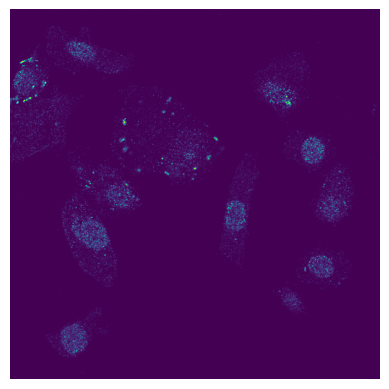

In [81]:
image = imread(path + '8e8cb5b8-bbc6-11e8-b2bc-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

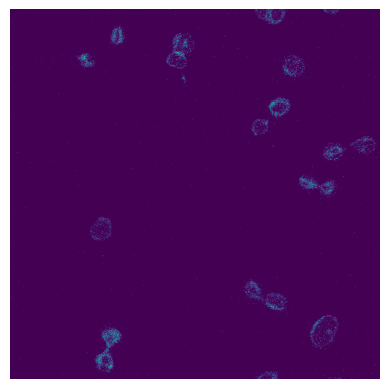

In [82]:
image = imread(path + '0bc3dbe0-bbbf-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

In [85]:
df_25[df_25['Predictions']<= 0.3].sort_values('Predictions', ascending=False).head()

Id Target  Predictions
20239  a725f8f8-bbb9-11e8-b2ba-ac1f6b6435d0     25     0.283508
25784  d47dc32a-bbb0-11e8-b2ba-ac1f6b6435d0     25     0.209656
9017   4b2886e8-bbae-11e8-b2ba-ac1f6b6435d0     25     0.198499
24506  ca0197a6-bbaf-11e8-b2ba-ac1f6b6435d0     25     0.074227
19426  a095f186-bbc9-11e8-b2bc-ac1f6b6435d0     25     0.000387

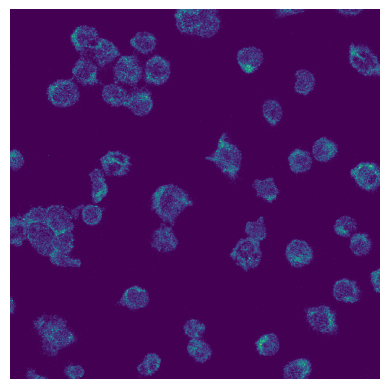

In [86]:
image = imread(path + 'a725f8f8-bbb9-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

In [87]:
df_25[df_25['Predictions']<= 0.1].sort_values('Predictions', ascending=False).head()

Id Target  Predictions
24506  ca0197a6-bbaf-11e8-b2ba-ac1f6b6435d0     25     0.074227
19426  a095f186-bbc9-11e8-b2bc-ac1f6b6435d0     25     0.000387

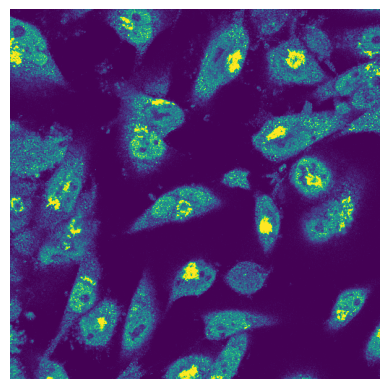

In [88]:
image = imread(path + 'a095f186-bbc9-11e8-b2bc-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

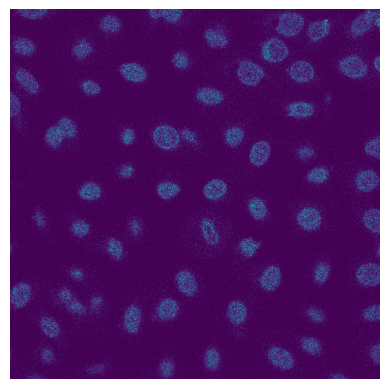

In [89]:
image = imread(path + 'ca0197a6-bbaf-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

In [27]:
ar_4_pred_dict = np.load('ar_4_predictions_14Jun.npz')

In [28]:
ar_4_pred = ar_4_pred_dict['arr_0']

In [29]:
ar_4_pred.shape

(1077, 1)

In [30]:
df_4.shape

(1077, 2)

In [34]:
df_4['Predictions'] = ar_4_pred

e:\Users\user\anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_4.head()

Id Target  Predictions
104  00e77c9c-bbc2-11e8-b2bb-ac1f6b6435d0      4     0.000810
145  0148ee6a-bba3-11e8-b2b9-ac1f6b6435d0      4     0.000281
170  0189cff8-bbc0-11e8-b2bb-ac1f6b6435d0      4     0.002443
186  01b79bd0-bba3-11e8-b2b9-ac1f6b6435d0      4     0.000101
259  0246331e-bbc0-11e8-b2bb-ac1f6b6435d0      4     0.267706

In [60]:
df_4[df_4['Predictions']>= 0].sort_values('Predictions').head()

Id Target   Predictions
15991  847aa45a-bbb6-11e8-b2ba-ac1f6b6435d0      4  4.840289e-12
5580   2e424322-bbb6-11e8-b2ba-ac1f6b6435d0      4  1.355535e-10
825    072206c4-bbb6-11e8-b2ba-ac1f6b6435d0      4  1.677710e-10
26173  d7b0a594-bb9c-11e8-b2b9-ac1f6b6435d0      4  9.120061e-10
3757   1f4b6fb0-bba2-11e8-b2b9-ac1f6b6435d0      4  1.292262e-09

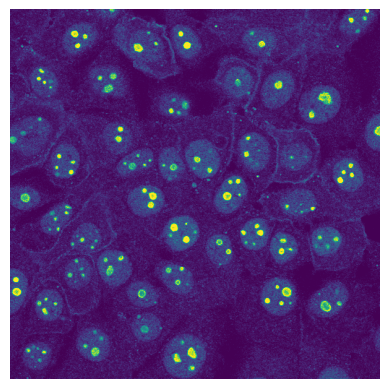

In [61]:
image = imread(path + '847aa45a-bbb6-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

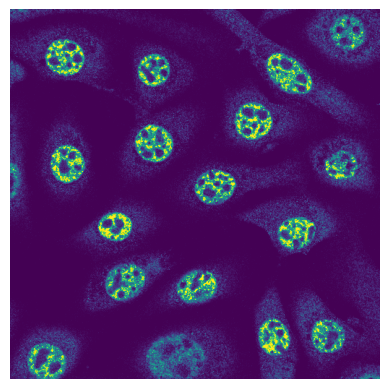

In [62]:
image = imread(path + '2e424322-bbb6-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

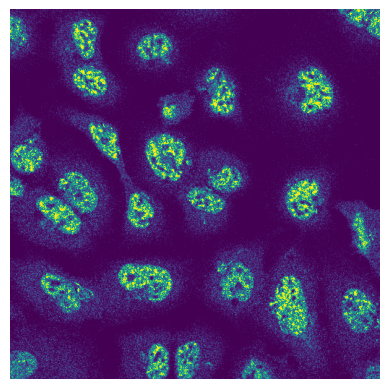

In [72]:
image = imread(path + '072206c4-bbb6-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

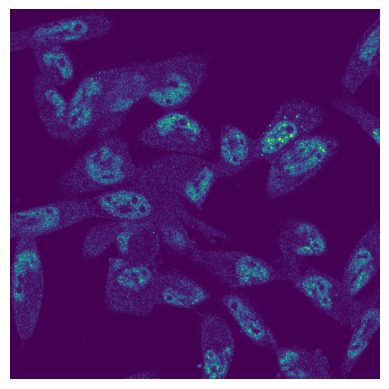

In [41]:
image = imread(path + '00e77c9c-bbc2-11e8-b2bb-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

In [51]:
df_4[df_4['Predictions']>= 0.25].sort_values('Predictions').head()

Id Target  Predictions
15098  7d134b46-bbab-11e8-b2ba-ac1f6b6435d0      4     0.255357
10808  59f68b06-bbc3-11e8-b2bc-ac1f6b6435d0      4     0.256629
6786   3848f968-bbb3-11e8-b2ba-ac1f6b6435d0      4     0.256842
25833  d4d110bc-bbc8-11e8-b2bc-ac1f6b6435d0      4     0.260933
878    07a134ce-bb9a-11e8-b2b9-ac1f6b6435d0      4     0.260940

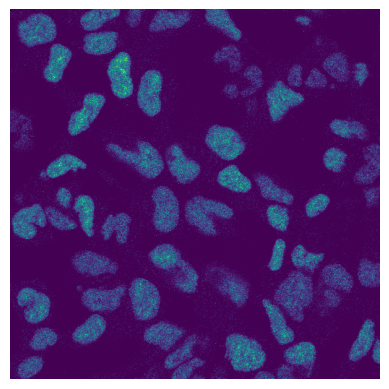

In [98]:
image = imread(path + '07a134ce-bb9a-11e8-b2b9-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

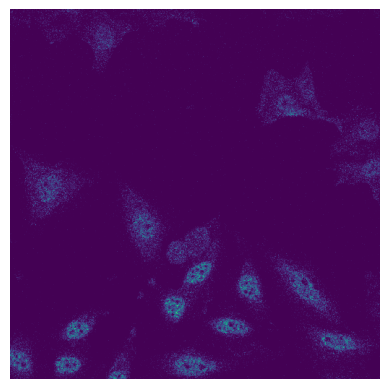

In [50]:
image = imread(path + '59f68b06-bbc3-11e8-b2bc-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

In [52]:
df_4[df_4['Predictions']>= 0.5].sort_values('Predictions').head()

Id Target  Predictions
11565  60239958-bbb2-11e8-b2ba-ac1f6b6435d0      4     0.505134
16979  8cccdb20-bbb9-11e8-b2ba-ac1f6b6435d0      4     0.516634
6103   32913e30-bbaa-11e8-b2ba-ac1f6b6435d0      4     0.520908
28902  ee139e56-bbb3-11e8-b2ba-ac1f6b6435d0      4     0.539868
8476   4668dd44-bbbb-11e8-b2ba-ac1f6b6435d0      4     0.542423

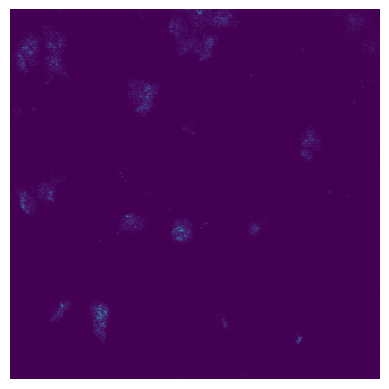

In [53]:
image = imread(path + '60239958-bbb2-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

In [54]:
df_4[df_4['Predictions']>= 0.75].sort_values('Predictions').head()

Id Target  Predictions
27947  e631f25a-bb9a-11e8-b2b9-ac1f6b6435d0      4     0.758982
17018  8d02be76-bbbd-11e8-b2ba-ac1f6b6435d0      4     0.760325
4598   26401796-bbaf-11e8-b2ba-ac1f6b6435d0      4     0.763061
15769  82b35558-bbb7-11e8-b2ba-ac1f6b6435d0      4     0.768600
22528  b9e66f66-bba7-11e8-b2ba-ac1f6b6435d0      4     0.769752

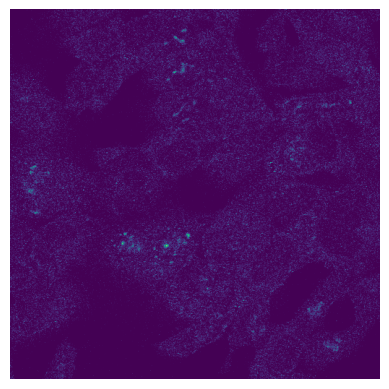

In [93]:
image = imread(path + '82b35558-bbb7-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

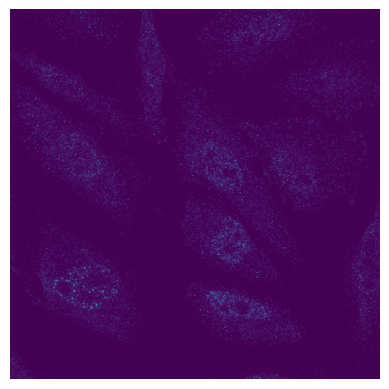

In [94]:
image = imread(path + 'b9e66f66-bba7-11e8-b2ba-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

In [58]:
df_4[df_4['Predictions']>= 0.9].sort_values('Predictions').head()

Id Target  Predictions
22550  ba0b7ef6-bbb5-11e8-b2ba-ac1f6b6435d0      4     0.926179
1528   0ccc4c36-bbae-11e8-b2ba-ac1f6b6435d0      4     0.928765
4706   271944aa-bbbc-11e8-b2ba-ac1f6b6435d0      4     0.939369
6081   326aa50a-bb9f-11e8-b2b9-ac1f6b6435d0      4     0.942005
15695  8237ae16-bbc2-11e8-b2bb-ac1f6b6435d0      4     0.969732

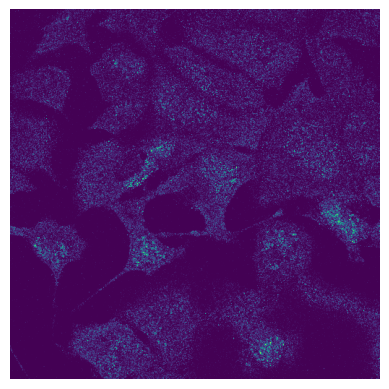

In [59]:
image = imread(path + '8237ae16-bbc2-11e8-b2bb-ac1f6b6435d0' + suffix)
plt.axis('off')
plt.imshow(image)

In [115]:
ar_25_wrong_2 = np.array([3.8455918e-01, 4.9822792e-01, 4.7628990e-01, 4.5052966e-01,
       4.1721350e-01, 3.6759216e-01, 3.7848479e-01, 1.9849935e-01,
       3.7952873e-01, 4.2121306e-01, 3.8430339e-01, 4.6698073e-01,
       3.8730460e-01, 3.0787596e-01, 4.9726984e-01, 4.9868900e-01,
       4.3416819e-01, 4.7540012e-01, 3.8669421e-04, 2.8350821e-01,
       7.4226901e-02, 2.0965613e-01, 4.8593679e-01, 3.6539626e-01,
       3.3766490e-01, 3.9168704e-01])

In [112]:
# ar_25_wrong_dict = np.load('ar_25_wrong_14Jun.npz')
# ar_25_wrong = ar_4_wrong_dict['arr_0']

Text(0.5, 1.0, 'Misclassified Cytosol')

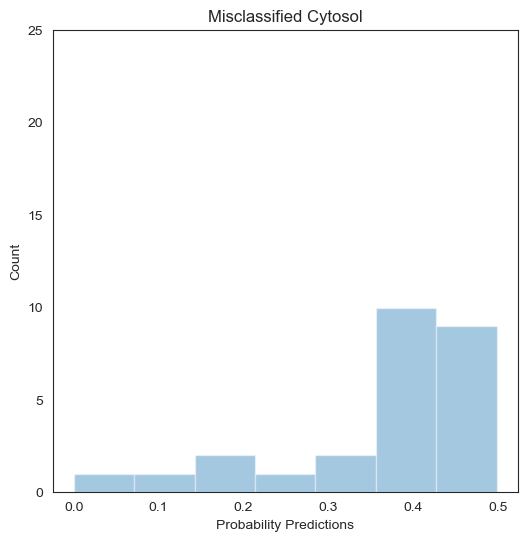

In [120]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6,6))
sns.distplot(ar_25_wrong_2, kde=False, axlabel= "Probability Predictions", ax= ax)
ax.set(ylim=(0, 25))
ax.set_ylabel('Count')
ax.set_title("Misclassified Cytosol")

Text(0.5, 1.0, 'Misclassified Nuclear Speckles')

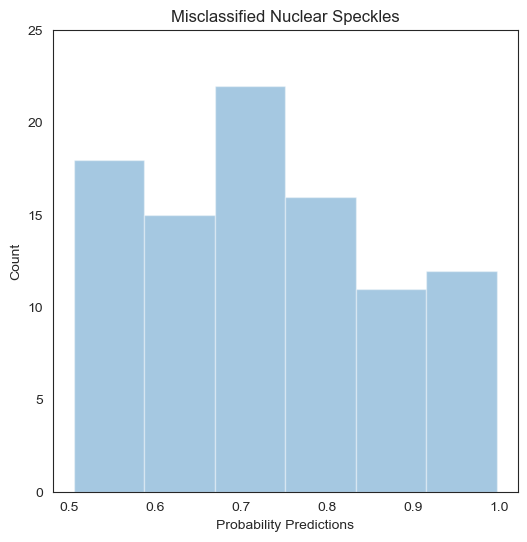

In [119]:
fig, ax = plt.subplots(figsize=(6,6))
sns.distplot(ar_4_wrong, kde=False, axlabel= "Probability Predictions", ax= ax)
ax.set(ylim=(0, 25))
ax.set_ylabel('Count')
ax.set_title("Misclassified Nuclear Speckles")

In [24]:
df_25['Id'].iloc[5]

'00c58890-bbbc-11e8-b2ba-ac1f6b6435d0'

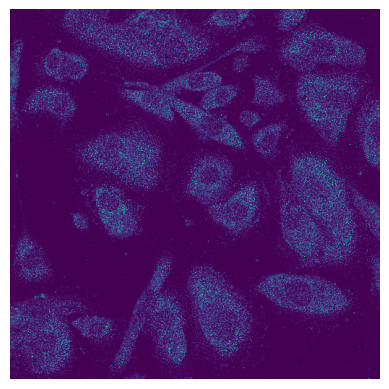

In [25]:
image = imread(path + df_25['Id'].iloc[10] + suffix)
plt.axis('off')
plt.imshow(image)

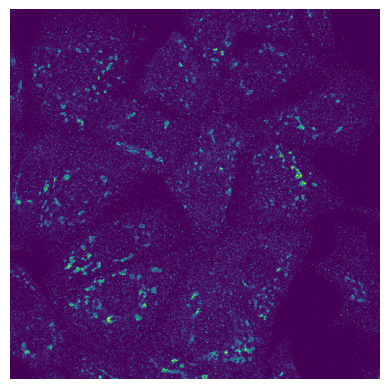

In [53]:
image = imread(path + df_25['Id'].iloc[11] + suffix)
plt.axis('off')
plt.imshow(image)

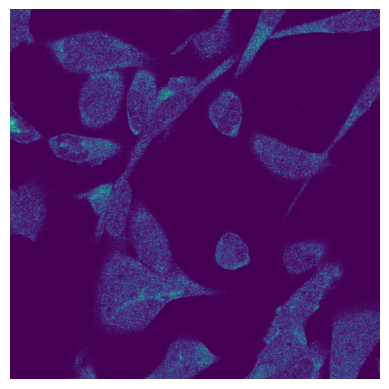

In [54]:
image = imread(path + df_25['Id'].iloc[12] + suffix)
plt.axis('off')
plt.imshow(image)

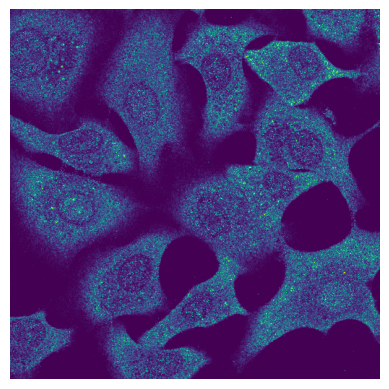

In [55]:
image = imread(path + df_25['Id'].iloc[13] + suffix)
plt.axis('off')
plt.imshow(image)

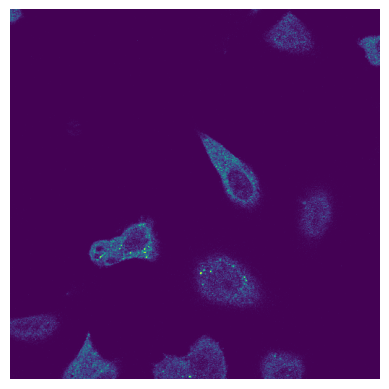

In [61]:
image = imread(path + df_25['Id'].iloc[14] + suffix)
plt.axis('off')
plt.imshow(image)

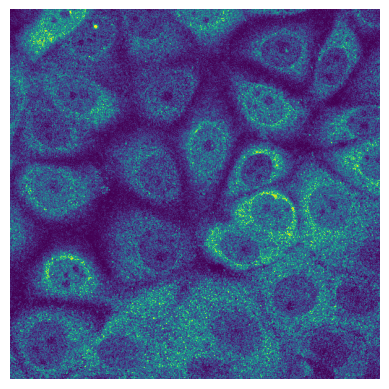

In [68]:
image = imread(path + df_25['Id'].iloc[16] + suffix)
plt.axis('off')
plt.imshow(image)

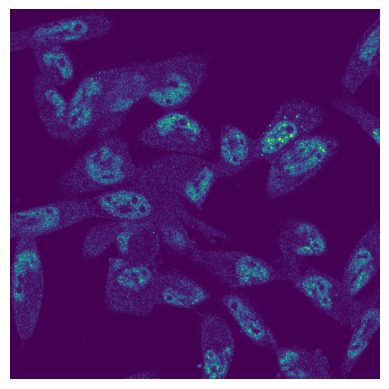

In [56]:
image = imread(path + df_4['Id'].iloc[0] + suffix)
plt.axis('off')
plt.imshow(image)

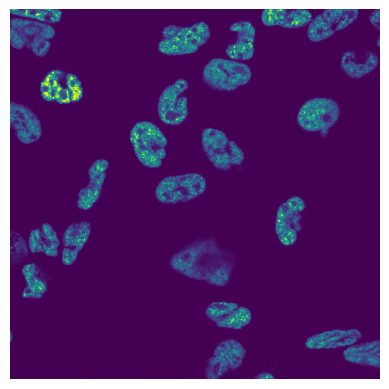

In [57]:
image = imread(path + df_4['Id'].iloc[1] + suffix)
plt.axis('off')
plt.imshow(image)

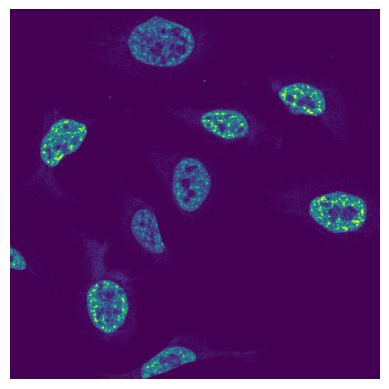

In [58]:
image = imread(path + df_4['Id'].iloc[2] + suffix)
plt.axis('off')
plt.imshow(image)

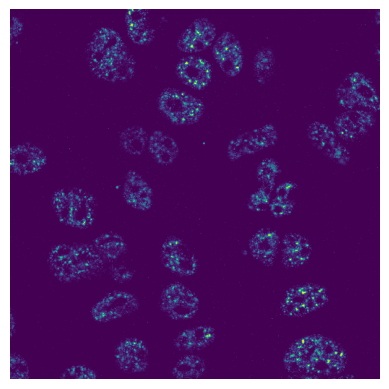

In [59]:
image = imread(path + df_4['Id'].iloc[3] + suffix)
plt.axis('off')
plt.imshow(image)

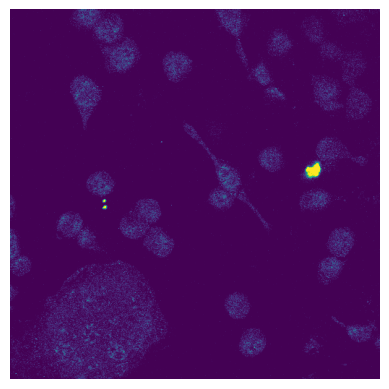

In [60]:
image = imread(path + df_4['Id'].iloc[4] + suffix)
plt.axis('off')
plt.imshow(image)

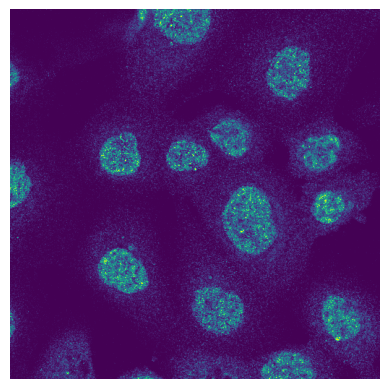

In [69]:
image = imread(path + df_4['Id'].iloc[5] + suffix)
plt.axis('off')
plt.imshow(image)

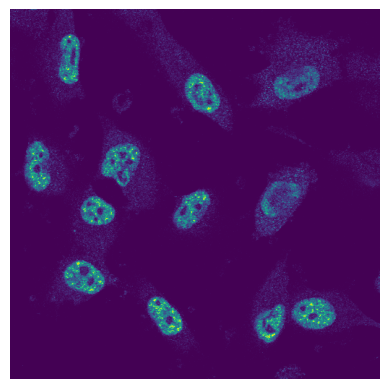

In [62]:
image = imread(path + df_4['Id'].iloc[101] + suffix)
plt.axis('off')
plt.imshow(image)

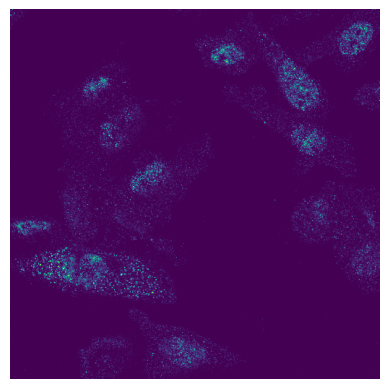

In [63]:
image = imread(path + df_4['Id'].iloc[102] + suffix)
plt.axis('off')
plt.imshow(image)

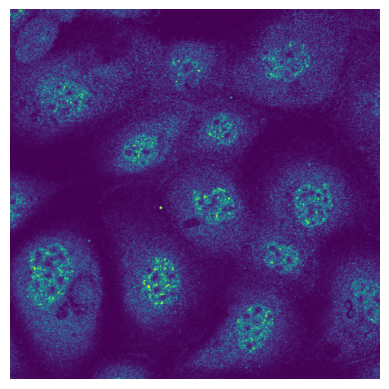

In [64]:
image = imread(path + df_4['Id'].iloc[103] + suffix)
plt.axis('off')
plt.imshow(image)

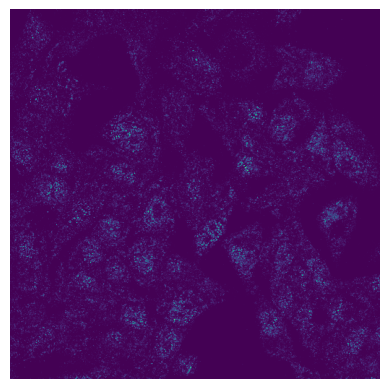

In [65]:
image = imread(path + df_4['Id'].iloc[104] + suffix)
plt.axis('off')
plt.imshow(image)

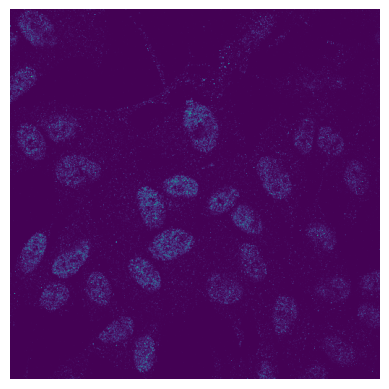

In [66]:
image = imread(path + df_4['Id'].iloc[105] + suffix)
plt.axis('off')
plt.imshow(image)

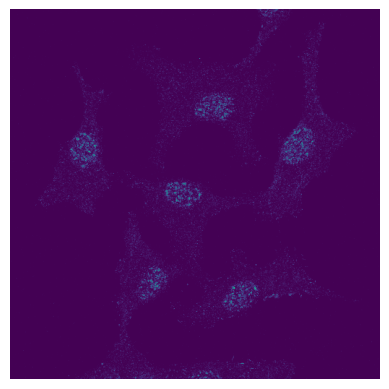

In [67]:
image = imread(path + df_4['Id'].iloc[128] + suffix)
plt.axis('off')
plt.imshow(image)

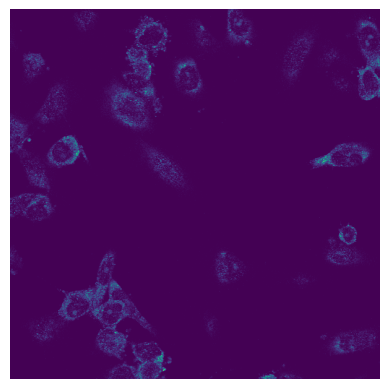

In [70]:
image = imread(path + df_25['Id'].iloc[113] + suffix)
plt.axis('off')
plt.imshow(image)

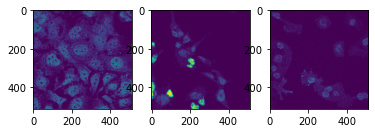

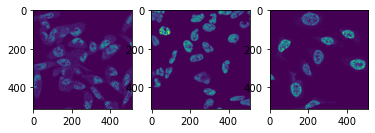

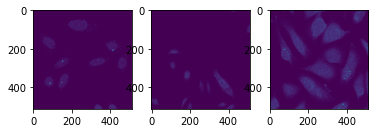

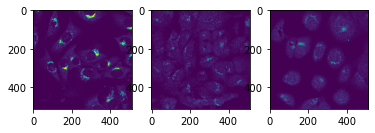

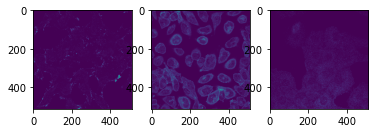

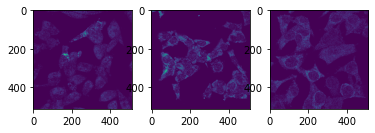

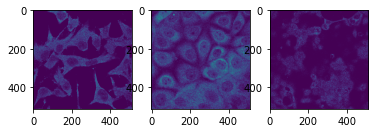

In [28]:
for my_df in list_df:
    for ix, name in enumerate(my_df['Id'].head(3)):
        plt.subplot(230 + 1 + ix)
        image = imread(path + name + suffix)
        plt.imshow(image)
    plt.show()